Show machine information for reproducibility:

In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 12 × Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 12 virtual cores)


Activate environment:

In [53]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
# add packages if needed
Pkg.add(["BenchmarkTools", "LinearAlgebra", "Plots", "Random", "Distributions", "RCall"])
Pkg.status()

  Activating project at `~/Documents/GitHub/biostat-m257-2024-spring/hw1`
   Resolving package versions...
    Updating `~/Documents/GitHub/biostat-m257-2024-spring/hw1/Project.toml`
  [6f49c342] + RCall v0.14.1
    Updating `~/Documents/GitHub/biostat-m257-2024-spring/hw1/Manifest.toml`
  [324d7699] + CategoricalArrays v0.10.8
  [8f4d0f93] + Conda v1.10.0
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.6.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [842dd82b] + InlineStrings v1.4.0
  [41ab1584] + InvertedIndices v1.3.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [2dfb63ee] + PooledArrays v1.4.3
  [08abe8d2] + PrettyTables v2.3.1
  [6f49c342] + RCall v0.14.1
  [91c51154] + SentinelArrays v1.4.1
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.3
  [892a3eda] + StringManipulation v0.3.4
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [81def892] + VersionParsing v1.3.0
  [1b915085] + WinReg v1.0.0
Precompiling project...
  ✓ Categor

Status `~/Documents/GitHub/biostat-m257-2024-spring/hw1/Project.toml`
  [6e4b80f9] BenchmarkTools v1.5.0
  [31c24e10] Distributions v0.25.107
  [bdcacae8] LoopVectorization v0.12.169
⌃ [91a5bcdd] Plots v1.40.3
  [f27b6e38] Polynomials v4.0.6
  [6f49c342] RCall v0.14.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
Info Packages marked with ⌃ have new versions available and may be upgradable.


  ✓ Latexify → DataFramesExt
  7 dependencies successfully precompiled in 32 seconds. 212 already precompiled.


In [54]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays
using Plots

[ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


## Q1. Git/GitHub

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-m257-2024-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, `Project.toml`, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

## Q2. Computer arithmetics

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

### Q2.1

In [4]:
x = 0.1
y = 0.1
z = 1.0
print(x+y+z)
print("\n")
print(y+z+x)
print("\n")
print(x+y+z == y+z+x)

1.2
1.2000000000000002
false

Above comparison results show that the associative rule is not applicable in Julia.

### Q2.2

In [5]:
x = 0.1
y = 0.1
z = 1000000000.0
print(x*y*z)
print("\n")
print(y*z*x)
print("\n")
print(x*y*z == y*z*x)

1.0000000000000002e7
1.0e7
false

Above results show that the multiplication associative rule is also not applicable in Julia.

### Q2.3

In [6]:
x = 1/7
y = 0.1
z = 7.0
print((x+y)*z)
print("\n")
print(x*z+y*z)
print("\n")
print((x+y)*z == x*z+y*z)

1.7
1.7000000000000002
false

Above results show that the distributive rule is also not applicable in Julia.

### Q2.4

In [7]:
typeof(typemax(Float64))

Float64

In [8]:
typeof(0.0)

Float64

In [9]:
0.0*typemax(Float64)

NaN

In [10]:
0.0*typemin(Float64)

NaN

This formula $0 * x = 0$ does not work on max/min floating number.

### Q2.5

In [11]:
x = 1.10000000002
a = π
x / a

0.35014087480853595

In [12]:
x * (1.0 / a)

0.350140874808536

In [13]:
x / a == x * (1.0 / a)

false

The formula $x / a == x * (1 / a)$ is not always true on floating numbers

## Q3. Multiple dispatch and JIT

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. Explain what do you find.  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

### Q3.1

In [14]:
function g(k::Int64)
    for i in 1:10
        k = 5k - 1
    end
    k
end
function g(k::Float64)
    for i in 1:10
        k = 5k - 1
    end
    k
end
methods(g)

# 2 methods for generic function "g" from Main:
 [1] g(k::Float64)
     @ In[14]:7
 [2] g(k::Int64)
     @ In[14]:1

In [15]:
@code_llvm g(2)

;  @ In[14]:1 within `g`
define i64 @julia_g_2105(i64 signext %0) #0 {
top:
;  @ In[14]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[14]:4 within `g`
  ret i64 %2
}


### Q3.2

In [16]:
@code_llvm g(2.0)

;  @ In[14]:7 within `g`
define double @julia_g_2128(double %0) #0 {
top:
;  @ In[14]:9 within `g`
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %10 = fadd double %9, -1.000000e+00

### Q3.3

By comparing the bitcode from Q3.1 and Q3.2, we can see that for floating numbers, this function takes significantly more steps than for integer numbers. Based on this finding, we can infer that the running time for the same function g but on floating numbers and integer numbers should be different, and the floating case should take longer time. The running time results are shown below.

In [17]:
a = 2
@benchmark g($a)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  3.084 ns … 20.623 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.404 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.429 ns ±  0.468 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

                           ▃█        ▃                        
  ▄▃▁▁▁▁▁▂▇▃▂▁▁▁▁▁▃▄▂▁▁▁▁▁▁██▂▂▁▁▁▁▁▁██▃▂▁▁▁▁▁▁▂▃▁▁▁▁▁▁▁▁▁▃▄ ▃
  3.08 ns        Histogram: frequency by time        3.79 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [18]:
a = 2.0
@benchmark g($a)

BenchmarkTools.Trial: 10000 samples with 999 evaluations.
 Range (min … max):  5.127 ns … 67.985 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     7.060 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.637 ns ±  1.452 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █                             █   ▁                         
  █▂▃▁▃▂▂▃▂▃▁▃▂▁▃▂▂▃▂▂▅▁▂▄▁▁▃▂▁▃█▂▁▅█▂▁▂▃▁▁▂▃▁▁▁▂▃▁▁▁▂▃▂▂▁▁▄ ▃
  5.13 ns        Histogram: frequency by time        8.85 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

### Q3.4

In [19]:
function g_fastmath(k::Int64)
    @fastmath for i in 1:10
        k = 5k - 1
    end
    k
end
function g_fastmath(k::Float64)
    @fastmath for i in 1:10
        k = 5k - 1
    end
    k
end
methods(g_fastmath)

# 2 methods for generic function "g_fastmath" from Main:
 [1] g_fastmath(k::Float64)
     @ In[19]:7
 [2] g_fastmath(k::Int64)
     @ In[19]:1

In [20]:
@code_llvm g_fastmath(2)

;  @ In[19]:1 within `g_fastmath`
define i64 @julia_g_fastmath_2637(i64 signext %0) #0 {
top:
;  @ In[19]:3 within `g_fastmath`
; ┌ @ fastmath.jl:269 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:269 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[19]:4 within `g_fastmath`
  ret i64 %2
}


In [21]:
@code_llvm g_fastmath(2.0)

;  @ In[19]:7 within `g_fastmath`
define double @julia_g_fastmath_2639(double %0) #0 {
top:
;  @ In[19]:9 within `g_fastmath`
; ┌ @ fastmath.jl:266 within `mul_fast` @ fastmath.jl:165
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:266 within `sub_fast` @ fastmath.jl:164
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[19]:10 within `g_fastmath`
  ret double %2
}


In [22]:
a = 2.0
@benchmark g_fastmath($a)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  3.174 ns … 21.051 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.408 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.550 ns ±  0.431 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

             █      ▃                                         
  ▃▂▁▁▁▄▄▂▁▁▁██▂▁▁▁▆█▂▂▁▂▂▂▄▂▁▁▂▁▂▄▂▁▁▂▁▁▃▄▂▂▁▁▁▁▂▃▂▂▁▁▁▁▁▂▅ ▃
  3.17 ns        Histogram: frequency by time        4.26 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

From above LLVM bitcode, we can see that @fastmath changed the computation steps for floating numbers, and use less processing steps for them. In Q3.2, there are 20 steps for g(2.0) while only 2 steps are conducted. The julia files indicate that @fastmath is allowing floating point optimizations that are correct for real numbers but lead to differences for IEEE numbers. And I checked the file "fastmath.jl" (https://github.com/JuliaLang/julia/blob/master/base/fastmath.jl#L31), they are using some transformed version of the expression for floating numbers. And I think this is the reason why it gives us a fast result.

## Q4. Evaluating a polynomial

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

### Q4.1

In [38]:
x = range(start = 0.988, stop = 1.012, step = 0.001)

0.988:0.001:1.012

In [42]:
function g_poly(k::Float64)
    k ^ 7 - 7 * (k ^ 6) + 21 * (k ^ 5) - 35 * (k ^ 4) + 35 * (k ^ 3) - 21 * (k ^ 2) + 7 * k - 1
end

g_poly (generic function with 1 method)

In [44]:
y = g_poly.(x)
y

25-element Vector{Float64}:
 -3.552713678800501e-14
 -2.3092638912203256e-14
 -1.4210854715202004e-14
 -7.993605777301127e-15
 -6.217248937900877e-15
 -4.440892098500626e-15
 -1.7763568394002505e-15
 -3.552713678800501e-15
 -1.7763568394002505e-15
 -2.6645352591003757e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
 -5.329070518200751e-15
 -6.217248937900877e-15
  1.7763568394002505e-15
 -1.7763568394002505e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
  2.6645352591003757e-15
 -3.552713678800501e-15
  7.105427357601002e-15
  1.865174681370263e-14
  4.618527782440651e-14

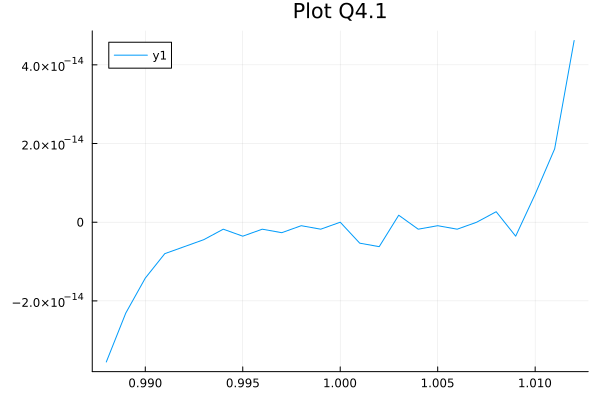

In [61]:
Plots.plot(x, y, title = "Plot Q4.1")

### Q4.2

In [62]:
function g_poly_2(k::Float64)
    (k - 1) ^ 7
end

g_poly_2 (generic function with 1 method)

In [63]:
y = g_poly_2.(x)
y

25-element Vector{Float64}:
 -3.583180800000022e-14
 -1.9487171000000122e-14
 -1.0000000000000062e-14
 -4.78296900000003e-15
 -2.0971520000000132e-15
 -8.235430000000051e-16
 -2.7993600000000173e-16
 -7.812500000000048e-17
 -1.6384000000000103e-17
 -2.1870000000000135e-18
 -1.280000000000008e-19
 -1.0000000000000063e-21
  0.0
  9.99999999999229e-22
  1.280000000000008e-19
  2.186999999999447e-18
  1.6384000000000103e-17
  7.812499999998834e-17
  2.7993600000000173e-16
  8.235429999999137e-16
  2.0971520000000132e-15
  4.7829689999996165e-15
  1.0000000000000062e-14
  1.9487170999998743e-14
  3.583180800000022e-14

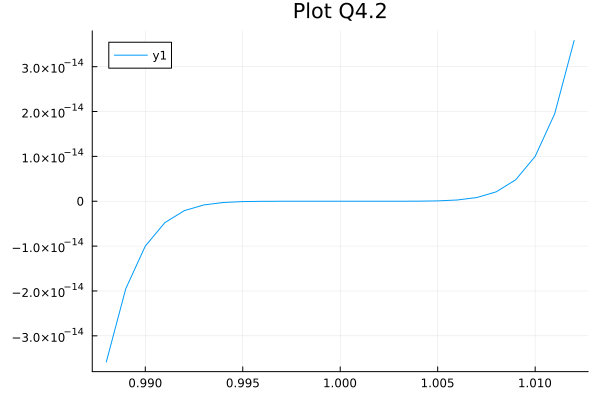

In [65]:
Plots.plot(x, y, title = "Plot Q4.2")

### Q4.3 

By comparing the plots in Q4.1 and Q4.2, we can obtain that the curve in Q4.2 is much smoother than the one in Q4.1. The reason should be the rounding precision for floating numbers, as in Q4.1 we are calculating the value of y partwisely, while in Q4.2, we are calculate it as a whole. When doing the computation in parts, different part will result in different rounding precision, hence the final results will be unprecise at the last several digits.

## Q5. Woodbury formula

Demonstrate the following results in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

1. **Sherman-Morrison formula**:
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. **Woodbury formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. **Binomial inversion formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. **Determinant identity**:
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

## Q6. Triangular matrix and orthogonal matrix

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

## Q7. Looping

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

2. Compare their speed and memory efficiencies using `BenchmarkTools.jl` at `n = 5000`.